Assignment: Movie Ratings & Revenue Analysis
Step 1: Create a CSV – movies.csv

PART 1: Pandas Operations
1. Load movies.csv into a Pandas DataFrame.
2. Convert ReleaseDate to datetime.
3. Calculate Profit = Revenue - Budget .
4. Add a column "Era" :
Before 2000 → Classic
2000-2010 → Mid
After 2010 → Modern
5. Handle nulls in Revenue by filling with average revenue.
6. Sort by Rating descending.
7. Group by Genre → average Rating & total Revenue.
8. Filter movies with Rating ≥ 8.5 and Profit >
500M.

9. Plot bar chart of Movie Title vs Profit.

In [ ]:
import pandas as pd
data=pd.read_csv('movies.csv')

In [ ]:
df=pd.DataFrame(data)
df

,MovieID,Title,Genre,ReleaseDate,Rating,Revenue,Budget
0,1,Inception,Sci-Fi,2010-07-16,8.8,8.255328e+08,160000000
1,2,The Dark Knight,Action,2008-07-18,9.0,1.004558e+09,185000000
2,3,Titanic,Romance,1997-12-19,7.8,2.187464e+09,200000000
3,4,Interstellar,Sci-Fi,2014-11-07,8.6,6.774713e+08,165000000
4,5,Joker,Drama,2019-10-04,8.4,1.074251e+09,55000000
5,6,The Notebook,Romance,2004-06-25,7.9,NaN,29000000
6,7,Avengers: Endgame,Action,2019-04-26,8.4,2.797801e+09,356000000


In [ ]:
# 2. Convert ReleaseDate to datetime.
df['ReleaseDate'] = pd.to_datetime(df['ReleaseDate'])
df

,MovieID,Title,Genre,ReleaseDate,Rating,Revenue,Budget
0,1,Inception,Sci-Fi,2010-07-16,8.8,8.255328e+08,160000000
1,2,The Dark Knight,Action,2008-07-18,9.0,1.004558e+09,185000000
2,3,Titanic,Romance,1997-12-19,7.8,2.187464e+09,200000000
3,4,Interstellar,Sci-Fi,2014-11-07,8.6,6.774713e+08,165000000
4,5,Joker,Drama,2019-10-04,8.4,1.074251e+09,55000000
5,6,The Notebook,Romance,2004-06-25,7.9,NaN,29000000
6,7,Avengers: Endgame,Action,2019-04-26,8.4,2.797801e+09,356000000


In [ ]:
# 3. Calculate Profit = Revenue - Budget .
df['Profit'] = df['Revenue'] - df['Budget']
df

,MovieID,Title,Genre,ReleaseDate,Rating,Revenue,Budget,Profit
0,1,Inception,Sci-Fi,2010-07-16,8.8,8.255328e+08,160000000,6.655328e+08
1,2,The Dark Knight,Action,2008-07-18,9.0,1.004558e+09,185000000,8.195584e+08
2,3,Titanic,Romance,1997-12-19,7.8,2.187464e+09,200000000,1.987464e+09
3,4,Interstellar,Sci-Fi,2014-11-07,8.6,6.774713e+08,165000000,5.124713e+08
4,5,Joker,Drama,2019-10-04,8.4,1.074251e+09,55000000,1.019251e+09
5,6,The Notebook,Romance,2004-06-25,7.9,NaN,29000000,NaN
6,7,Avengers: Endgame,Action,2019-04-26,8.4,2.797801e+09,356000000,2.441801e+09


In [ ]:
# 4. Add a column "Era" :
# Before 2000 → Classic
# 2000-2010 → Mid
# After 2010 → Modern


In [ ]:
# 4. Add 'Era' column
def assign_era(date):
    year = date.year
    if year < 2000:
        return 'Classic'
    elif 2000 <= year <= 2010:
        return 'Mid'
    else:
        return 'Modern'

df['Era'] = df['ReleaseDate'].apply(assign_era)
df

,MovieID,Title,Genre,ReleaseDate,Rating,Revenue,Budget,Profit,Era
0,1,Inception,Sci-Fi,2010-07-16,8.8,8.255328e+08,160000000,6.655328e+08,Mid
1,2,The Dark Knight,Action,2008-07-18,9.0,1.004558e+09,185000000,8.195584e+08,Mid
2,3,Titanic,Romance,1997-12-19,7.8,2.187464e+09,200000000,1.987464e+09,Classic
3,4,Interstellar,Sci-Fi,2014-11-07,8.6,6.774713e+08,165000000,5.124713e+08,Modern
4,5,Joker,Drama,2019-10-04,8.4,1.074251e+09,55000000,1.019251e+09,Modern
5,6,The Notebook,Romance,2004-06-25,7.9,NaN,29000000,NaN,Mid
6,7,Avengers: Endgame,Action,2019-04-26,8.4,2.797801e+09,356000000,2.441801e+09,Modern


In [ ]:
# 5. Handle nulls in Revenue by filling with average revenue
avg_revenue = df['Revenue'].mean()
df['Revenue'].fillna(avg_revenue, inplace=True)
df

/tmp/ipython-input-3576399702.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Revenue'].fillna(avg_revenue, inplace=True)


,MovieID,Title,Genre,ReleaseDate,Rating,Revenue,Budget,Profit,Era
0,1,Inception,Sci-Fi,2010-07-16,8.8,8.255328e+08,160000000,6.655328e+08,Mid
1,2,The Dark Knight,Action,2008-07-18,9.0,1.004558e+09,185000000,8.195584e+08,Mid
2,3,Titanic,Romance,1997-12-19,7.8,2.187464e+09,200000000,1.987464e+09,Classic
3,4,Interstellar,Sci-Fi,2014-11-07,8.6,6.774713e+08,165000000,5.124713e+08,Modern
4,5,Joker,Drama,2019-10-04,8.4,1.074251e+09,55000000,1.019251e+09,Modern
5,6,The Notebook,Romance,2004-06-25,7.9,1.427846e+09,29000000,NaN,Mid
6,7,Avengers: Endgame,Action,2019-04-26,8.4,2.797801e+09,356000000,2.441801e+09,Modern


In [ ]:
df['Profit'] = df['Revenue'] - df['Budget']
df

,MovieID,Title,Genre,ReleaseDate,Rating,Revenue,Budget,Profit,Era
0,1,Inception,Sci-Fi,2010-07-16,8.8,8.255328e+08,160000000,6.655328e+08,Mid
1,2,The Dark Knight,Action,2008-07-18,9.0,1.004558e+09,185000000,8.195584e+08,Mid
2,3,Titanic,Romance,1997-12-19,7.8,2.187464e+09,200000000,1.987464e+09,Classic
3,4,Interstellar,Sci-Fi,2014-11-07,8.6,6.774713e+08,165000000,5.124713e+08,Modern
4,5,Joker,Drama,2019-10-04,8.4,1.074251e+09,55000000,1.019251e+09,Modern
5,6,The Notebook,Romance,2004-06-25,7.9,1.427846e+09,29000000,1.398846e+09,Mid
6,7,Avengers: Endgame,Action,2019-04-26,8.4,2.797801e+09,356000000,2.441801e+09,Modern


In [ ]:
# 6. Sort by Rating descending
df_sorted = df.sort_values(by='Rating', ascending=False)
df_sorted

,MovieID,Title,Genre,ReleaseDate,Rating,Revenue,Budget,Profit,Era
1,2,The Dark Knight,Action,2008-07-18,9.0,1.004558e+09,185000000,8.195584e+08,Mid
0,1,Inception,Sci-Fi,2010-07-16,8.8,8.255328e+08,160000000,6.655328e+08,Mid
3,4,Interstellar,Sci-Fi,2014-11-07,8.6,6.774713e+08,165000000,5.124713e+08,Modern
6,7,Avengers: Endgame,Action,2019-04-26,8.4,2.797801e+09,356000000,2.441801e+09,Modern
4,5,Joker,Drama,2019-10-04,8.4,1.074251e+09,55000000,1.019251e+09,Modern
5,6,The Notebook,Romance,2004-06-25,7.9,1.427846e+09,29000000,1.398846e+09,Mid
2,3,Titanic,Romance,1997-12-19,7.8,2.187464e+09,200000000,1.987464e+09,Classic


In [ ]:
# 7. Group by Genre → average Rating & total Revenue
genre_summary = df.groupby('Genre').agg(
    Avg_Rating=('Rating', 'mean'),
    Total_Revenue=('Revenue', 'sum')
).reset_index()
genre_summary


,Genre,Avg_Rating,Total_Revenue
0,Action,8.70,3.802359e+09
1,Drama,8.40,1.074251e+09
2,Romance,7.85,3.615310e+09
3,Sci-Fi,8.70,1.503004e+09


In [ ]:
# 8. Filter movies with Rating ≥ 8.5 and Profit > 500M
high_perf_movies = df[(df['Rating'] >= 8.5) & (df['Profit'] > 500_000_000)]
high_perf_movies

,MovieID,Title,Genre,ReleaseDate,Rating,Revenue,Budget,Profit,Era
0,1,Inception,Sci-Fi,2010-07-16,8.8,8.255328e+08,160000000,665532764.0,Mid
1,2,The Dark Knight,Action,2008-07-18,9.0,1.004558e+09,185000000,819558444.0,Mid
3,4,Interstellar,Sci-Fi,2014-11-07,8.6,6.774713e+08,165000000,512471339.0,Modern


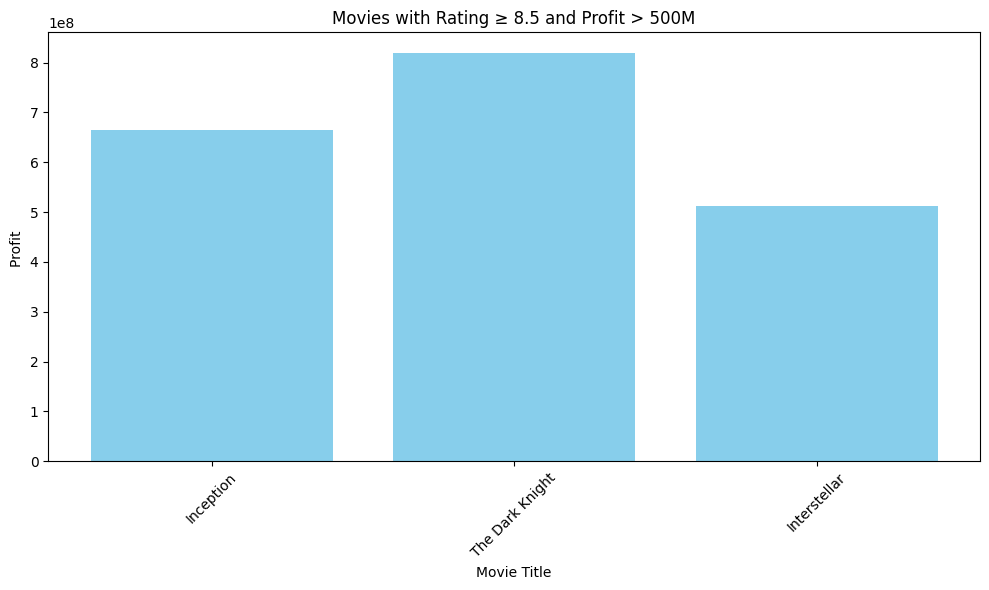

In [ ]:
# 9. Plot bar chart of Movie Title vs Profit

from matplotlib import pyplot as plt

plt.figure(figsize=(10,6))
plt.bar(high_perf_movies['Title'], high_perf_movies['Profit'], color='skyblue')
plt.xlabel('Movie Title')
plt.ylabel('Profit ')
plt.title('Movies with Rating ≥ 8.5 and Profit > 500M')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

PART 2: PySpark Operations
1. Read the same CSV using PySpark.
2. Create Profit column ( Revenue - Budget ).
3. Filter where Genre == 'Sci-Fi' and Profit > 500000000 .
4. Group by Genre → avg(Rating) , sum(Profit)
5. Use when().otherwise() to classify Rating as:
=9 → Blockbuster
8–9 → Hit
below 8 → Average

6. Drop the Budget column.
7. Fill null revenue with average (use na.fill() or na.replace() ).
8. Convert ReleaseDate to date type, extract year and month .
9. Use a window function to rank movies within each genre by profit.

In [4]:
from pyspark.sql import SparkSession

spark = SparkSession.builder.appName("MoviesAnalysis").getOrCreate()
df = spark.read.csv("movies.csv", header=True, inferSchema=True)
df.show()

+-------+-----------------+-------+-----------+------+----------+---------+
|MovieID|            Title|  Genre|ReleaseDate|Rating|   Revenue|   Budget|
+-------+-----------------+-------+-----------+------+----------+---------+
|      1|        Inception| Sci-Fi| 2010-07-16|   8.8| 825532764|160000000|
|      2|  The Dark Knight| Action| 2008-07-18|   9.0|1004558444|185000000|
|      3|          Titanic|Romance| 1997-12-19|   7.8|2187463944|200000000|
|      4|     Interstellar| Sci-Fi| 2014-11-07|   8.6| 677471339|165000000|
|      5|            Joker|  Drama| 2019-10-04|   8.4|1074251311| 55000000|
|      6|     The Notebook|Romance| 2004-06-25|   7.9|      NULL| 29000000|
|      7|Avengers: Endgame| Action| 2019-04-26|   8.4|2797800564|356000000|
+-------+-----------------+-------+-----------+------+----------+---------+



In [5]:
# 2) create revenue
from pyspark.sql.functions import col

df=df.withColumn("Profit",col("Revenue")-col("Budget"))
df.show()

+-------+-----------------+-------+-----------+------+----------+---------+----------+
|MovieID|            Title|  Genre|ReleaseDate|Rating|   Revenue|   Budget|    Profit|
+-------+-----------------+-------+-----------+------+----------+---------+----------+
|      1|        Inception| Sci-Fi| 2010-07-16|   8.8| 825532764|160000000| 665532764|
|      2|  The Dark Knight| Action| 2008-07-18|   9.0|1004558444|185000000| 819558444|
|      3|          Titanic|Romance| 1997-12-19|   7.8|2187463944|200000000|1987463944|
|      4|     Interstellar| Sci-Fi| 2014-11-07|   8.6| 677471339|165000000| 512471339|
|      5|            Joker|  Drama| 2019-10-04|   8.4|1074251311| 55000000|1019251311|
|      6|     The Notebook|Romance| 2004-06-25|   7.9|      NULL| 29000000|      NULL|
|      7|Avengers: Endgame| Action| 2019-04-26|   8.4|2797800564|356000000|2441800564|
+-------+-----------------+-------+-----------+------+----------+---------+----------+



In [6]:
#3)Filter where Genre == 'Sci-Fi' and Profit > 500000000 .
filtered_df = df.filter((col("Genre") == "Sci-Fi") & (col("Profit") > 500000000))
filtered_df.show()

+-------+------------+------+-----------+------+---------+---------+---------+
|MovieID|       Title| Genre|ReleaseDate|Rating|  Revenue|   Budget|   Profit|
+-------+------------+------+-----------+------+---------+---------+---------+
|      1|   Inception|Sci-Fi| 2010-07-16|   8.8|825532764|160000000|665532764|
|      4|Interstellar|Sci-Fi| 2014-11-07|   8.6|677471339|165000000|512471339|
+-------+------------+------+-----------+------+---------+---------+---------+



In [8]:
# 4. Group by Genre → avg(Rating) , sum(Profit)
from pyspark.sql.functions import avg, sum

genre = df.groupBy("Genre").agg(avg("Rating").alias("Avg_Rating"),sum("Profit").alias("Total_Profit"))
genre.show()

+-------+----------+------------+
|  Genre|Avg_Rating|Total_Profit|
+-------+----------+------------+
|Romance|      7.85|  1987463944|
|  Drama|       8.4|  1019251311|
| Action|       8.7|  3261359008|
| Sci-Fi|       8.7|  1178004103|
+-------+----------+------------+



In [12]:
# 5. Use when().otherwise() to classify Rating as:
# =9 → Blockbuster
# 8–9 → Hit
# below 8 → Average

from pyspark.sql.functions import when
df = df.withColumn("Rating_Category",
                   when((col("Rating") == 9), "Blockbuster")
                   .when((col("Rating") >= 8) & (col("Rating") <= 9), "Hit")
                   .otherwise("Average"))
df.show()

+-------+-----------------+-------+-----------+------+----------+---------+----------+---------------+
|MovieID|            Title|  Genre|ReleaseDate|Rating|   Revenue|   Budget|    Profit|Rating_Category|
+-------+-----------------+-------+-----------+------+----------+---------+----------+---------------+
|      1|        Inception| Sci-Fi| 2010-07-16|   8.8| 825532764|160000000| 665532764|            Hit|
|      2|  The Dark Knight| Action| 2008-07-18|   9.0|1004558444|185000000| 819558444|    Blockbuster|
|      3|          Titanic|Romance| 1997-12-19|   7.8|2187463944|200000000|1987463944|        Average|
|      4|     Interstellar| Sci-Fi| 2014-11-07|   8.6| 677471339|165000000| 512471339|            Hit|
|      5|            Joker|  Drama| 2019-10-04|   8.4|1074251311| 55000000|1019251311|            Hit|
|      6|     The Notebook|Romance| 2004-06-25|   7.9|      NULL| 29000000|      NULL|        Average|
|      7|Avengers: Endgame| Action| 2019-04-26|   8.4|2797800564|35600000

In [13]:
# 6. Drop the Budget column.

df=df.drop(col("Budget"))
df.show()

+-------+-----------------+-------+-----------+------+----------+----------+---------------+
|MovieID|            Title|  Genre|ReleaseDate|Rating|   Revenue|    Profit|Rating_Category|
+-------+-----------------+-------+-----------+------+----------+----------+---------------+
|      1|        Inception| Sci-Fi| 2010-07-16|   8.8| 825532764| 665532764|            Hit|
|      2|  The Dark Knight| Action| 2008-07-18|   9.0|1004558444| 819558444|    Blockbuster|
|      3|          Titanic|Romance| 1997-12-19|   7.8|2187463944|1987463944|        Average|
|      4|     Interstellar| Sci-Fi| 2014-11-07|   8.6| 677471339| 512471339|            Hit|
|      5|            Joker|  Drama| 2019-10-04|   8.4|1074251311|1019251311|            Hit|
|      6|     The Notebook|Romance| 2004-06-25|   7.9|      NULL|      NULL|        Average|
|      7|Avengers: Endgame| Action| 2019-04-26|   8.4|2797800564|2441800564|            Hit|
+-------+-----------------+-------+-----------+------+----------+-----

In [14]:
# 7. Fill null revenue with average (use na.fill() or na.replace() ).
from pyspark.sql.functions import avg

avg_revenue = df.select(avg(col("Revenue"))).collect()[0][0]
df = df.na.fill({"Revenue": avg_revenue})
df.show()


+-------+-----------------+-------+-----------+------+----------+----------+---------------+
|MovieID|            Title|  Genre|ReleaseDate|Rating|   Revenue|    Profit|Rating_Category|
+-------+-----------------+-------+-----------+------+----------+----------+---------------+
|      1|        Inception| Sci-Fi| 2010-07-16|   8.8| 825532764| 665532764|            Hit|
|      2|  The Dark Knight| Action| 2008-07-18|   9.0|1004558444| 819558444|    Blockbuster|
|      3|          Titanic|Romance| 1997-12-19|   7.8|2187463944|1987463944|        Average|
|      4|     Interstellar| Sci-Fi| 2014-11-07|   8.6| 677471339| 512471339|            Hit|
|      5|            Joker|  Drama| 2019-10-04|   8.4|1074251311|1019251311|            Hit|
|      6|     The Notebook|Romance| 2004-06-25|   7.9|1427846394|      NULL|        Average|
|      7|Avengers: Endgame| Action| 2019-04-26|   8.4|2797800564|2441800564|            Hit|
+-------+-----------------+-------+-----------+------+----------+-----

In [16]:
# 8. Convert ReleaseDate to date type, extract year and month .
from pyspark.sql.functions import to_date, year, month

from pyspark.sql.functions import to_date, year, month

df = df.withColumn("ReleaseDate", to_date(col("ReleaseDate"), "yyyy-MM-dd")) \
       .withColumn("Year", year(col("ReleaseDate"))) \
       .withColumn("Month", month(col("ReleaseDate")))

df.show()

+-------+-----------------+-------+-----------+------+----------+----------+---------------+----+-----+
|MovieID|            Title|  Genre|ReleaseDate|Rating|   Revenue|    Profit|Rating_Category|Year|Month|
+-------+-----------------+-------+-----------+------+----------+----------+---------------+----+-----+
|      1|        Inception| Sci-Fi| 2010-07-16|   8.8| 825532764| 665532764|            Hit|2010|    7|
|      2|  The Dark Knight| Action| 2008-07-18|   9.0|1004558444| 819558444|    Blockbuster|2008|    7|
|      3|          Titanic|Romance| 1997-12-19|   7.8|2187463944|1987463944|        Average|1997|   12|
|      4|     Interstellar| Sci-Fi| 2014-11-07|   8.6| 677471339| 512471339|            Hit|2014|   11|
|      5|            Joker|  Drama| 2019-10-04|   8.4|1074251311|1019251311|            Hit|2019|   10|
|      6|     The Notebook|Romance| 2004-06-25|   7.9|1427846394|      NULL|        Average|2004|    6|
|      7|Avengers: Endgame| Action| 2019-04-26|   8.4|2797800564

In [18]:
# 9. Use a window function to rank movies within each genre by profit.
from pyspark.sql.window import Window
from pyspark.sql.functions import rank

window_spec = Window.partitionBy("Genre").orderBy(col("Profit").desc())

df = df.withColumn("RankWithinGenre", rank().over(window_spec))
df.show()


+-------+-----------------+-------+-----------+------+----------+----------+---------------+----+-----+---------------+
|MovieID|            Title|  Genre|ReleaseDate|Rating|   Revenue|    Profit|Rating_Category|Year|Month|RankWithinGenre|
+-------+-----------------+-------+-----------+------+----------+----------+---------------+----+-----+---------------+
|      7|Avengers: Endgame| Action| 2019-04-26|   8.4|2797800564|2441800564|            Hit|2019|    4|              1|
|      2|  The Dark Knight| Action| 2008-07-18|   9.0|1004558444| 819558444|    Blockbuster|2008|    7|              2|
|      5|            Joker|  Drama| 2019-10-04|   8.4|1074251311|1019251311|            Hit|2019|   10|              1|
|      3|          Titanic|Romance| 1997-12-19|   7.8|2187463944|1987463944|        Average|1997|   12|              1|
|      6|     The Notebook|Romance| 2004-06-25|   7.9|1427846394|      NULL|        Average|2004|    6|              2|
|      1|        Inception| Sci-Fi| 2010

PART 3: JSON + Union Example
movies_bonus.json
[
{"MovieID": 8, "Title": "Barbie", "Genre": "Drama", "Rating": 7.5, "Revenue":
1456000000, "Budget": 145000000},
{"MovieID": 9, "Title": "Oppenheimer", "Genre": "Drama", "Rating": 8.6, "Revenue":
950000000, "Budget": 100000000}
]
1. Read this JSON using PySpark.
2. Union it with your original movies DataFrame.
3. Show top 5 highest grossing movies.
4. Save final merged DataFrame as CSV.

In [34]:
# 1. Read JSON using PySpark
bdf = spark.read.json("movies.json")


In [38]:
from pyspark.sql.functions import lit

for col_name in df.columns:
    if col_name not in bdf.columns:
        bdf = bdf.withColumn(col_name, lit(None))

bdf = bdf.select(df.columns)

merged_df = df.unionByName(bdf)


In [39]:
# Step 3: Top 5 Highest Grossing Movies
high_gross = merged_df.orderBy(col("Revenue").desc()).limit(5)
high_gross.show()

+-------+-----------------+-------+-----------+------+----------+----------+---------------+----+-----+---------------+
|MovieID|            Title|  Genre|ReleaseDate|Rating|   Revenue|    Profit|Rating_Category|Year|Month|RankWithinGenre|
+-------+-----------------+-------+-----------+------+----------+----------+---------------+----+-----+---------------+
|      7|Avengers: Endgame| Action| 2019-04-26|   8.4|2797800564|2441800564|            Hit|2019|    4|              1|
|      3|          Titanic|Romance| 1997-12-19|   7.8|2187463944|1987463944|        Average|1997|   12|              1|
|      6|     The Notebook|Romance| 2004-06-25|   7.9|1427846394|      NULL|        Average|2004|    6|              2|
|      5|            Joker|  Drama| 2019-10-04|   8.4|1074251311|1019251311|            Hit|2019|   10|              1|
|      2|  The Dark Knight| Action| 2008-07-18|   9.0|1004558444| 819558444|    Blockbuster|2008|    7|              2|
+-------+-----------------+-------+-----

In [40]:
# Step 4: Save Merged DataFrame as CSV
merged_df.write.csv("merged_movies.csv", header=True, mode="overwrite")